# Task
1. Select a dataset of your choice from Kaggle, or you can use one of the following:

    from sklearn.datasets import load_breast_cancer
    data = load_breast_cancer()

    import seaborn as sns
    iris_df = sns.load_dataset('iris')

2. Follow the 7 steps for building a Machine Learning model to create your first ML project. Remember, programming is 80% about researching and learning—don’t hesitate to Google when needed!

3. Once completed, push your project to GitHub and take pride in your work!

4. Check if anyone in Slack needs help. If you can assist someone, that's another reason to feel proud of yourself! 😊

## 7 Steps of building a Machine Learning model
1. Understand the Data: Inspect, explore, and understand the features.
2. Handle Missing Data: Drop or impute missing values.
3. Feature Engineering: Transform, create, or encode new features.
4. Handle Outliers: Detect and handle extreme values.
5. Split Data: Create training and testing datasets.
6. Train the Model: Fit the model to the training data.
7. Evaluate the Model: Test the model and evaluate its performance.

# lets go !!!

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load & Read in the dataset
df = pd.read_csv("/Users/kobynaebow/Desktop/REDi_ML:AI/Homework/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Attribute Information

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

In [4]:
# Print the info of the dataset, which shows the data type, rows and columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# Stastical summary of the dataset
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
# Check if missing data exists
print()
print("Number of lines", len(df))

print("Observations with Not A Number ")
for column in df.columns:
    
    print(column,": ",df[column].isna().sum()) 


Number of lines 918
Observations with Not A Number 
Age :  0
Sex :  0
ChestPainType :  0
RestingBP :  0
Cholesterol :  0
FastingBS :  0
RestingECG :  0
MaxHR :  0
ExerciseAngina :  0
Oldpeak :  0
ST_Slope :  0
HeartDisease :  0


In [7]:
# Now calculate statistics for specific columns (e.g., mean, median)
df['Age'].mean(), df['HeartDisease'].value_counts(), df['Sex'].value_counts()

(53.510893246187365,
 HeartDisease
 1    508
 0    410
 Name: count, dtype: int64,
 Sex
 M    725
 F    193
 Name: count, dtype: int64)

In [9]:
# Count the number of subjects based on sex, who have heart diseases
df[df.HeartDisease == 1]['Sex'].value_counts()

Sex
M    458
F     50
Name: count, dtype: int64

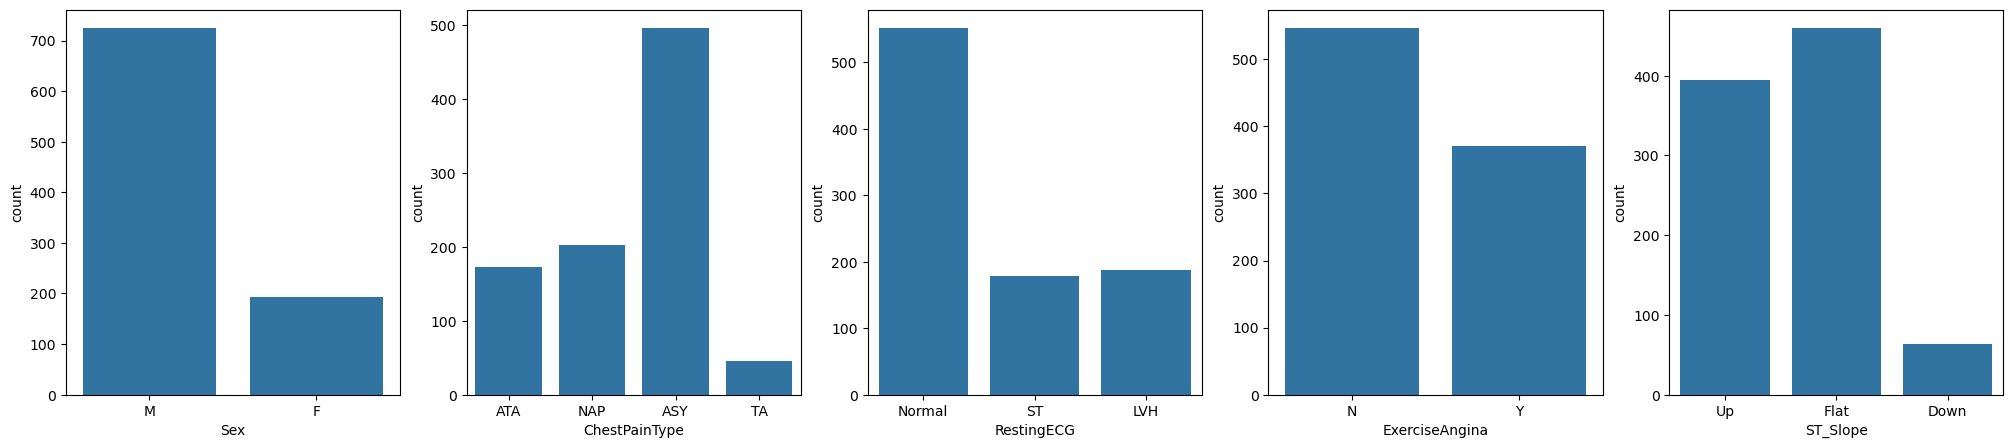

In [10]:
# Visualise some columns of our dataset
cat=['Sex', 'ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
plt.figure(figsize=(25,5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    sns.countplot(x=cat[i], data=df)

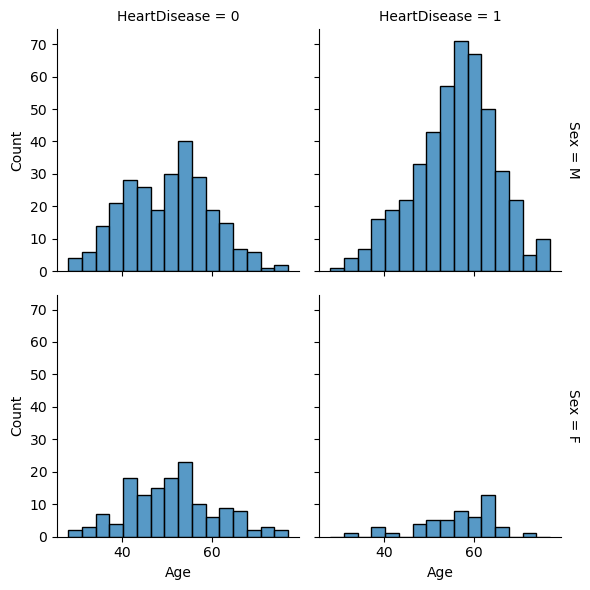

In [12]:
# Visualise some columns of our dataset
sns.displot(
df, x="Age", col="HeartDisease", row="Sex",
binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

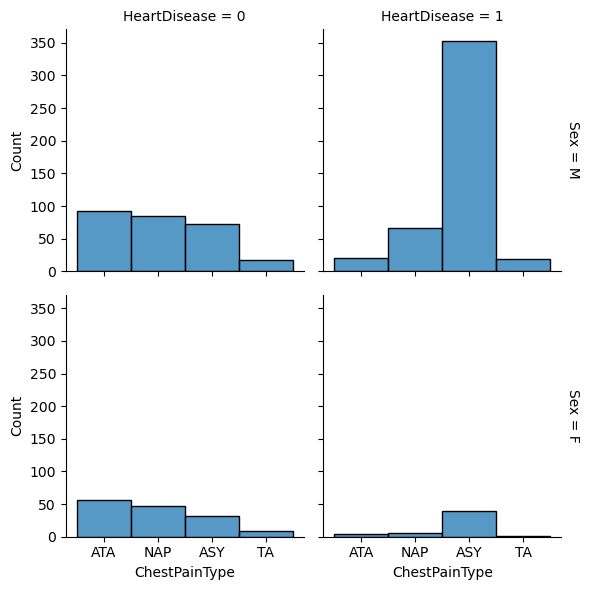

In [13]:
# Visualise some columns of our dataset
sns.displot(
df, x="ChestPainType", col="HeartDisease", row="Sex",
binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

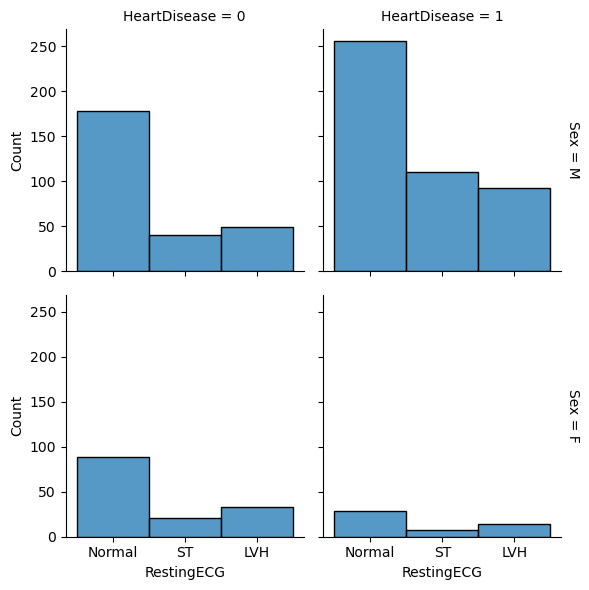

In [14]:
# Visualise some columns of our dataset

sns.displot(
df, x="RestingECG", col="HeartDisease", row="Sex",
binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

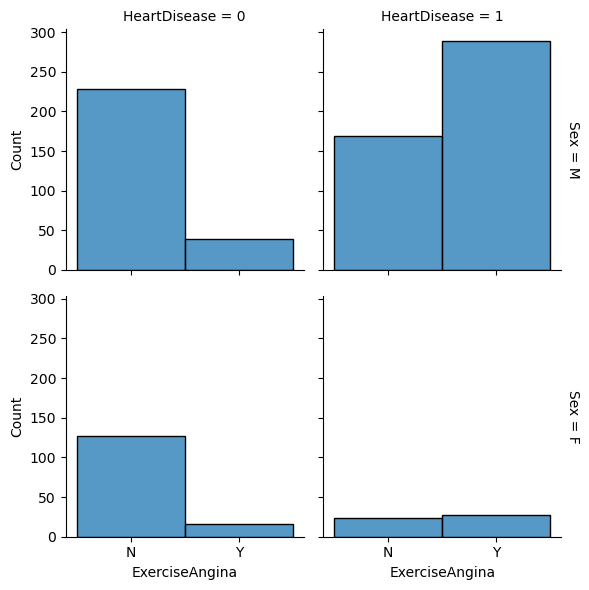

In [15]:
# Visualise some columns of our dataset
sns.displot(
df, x="ExerciseAngina", col="HeartDisease", row="Sex",
binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

<Axes: xlabel='RestingBP', ylabel='Count'>

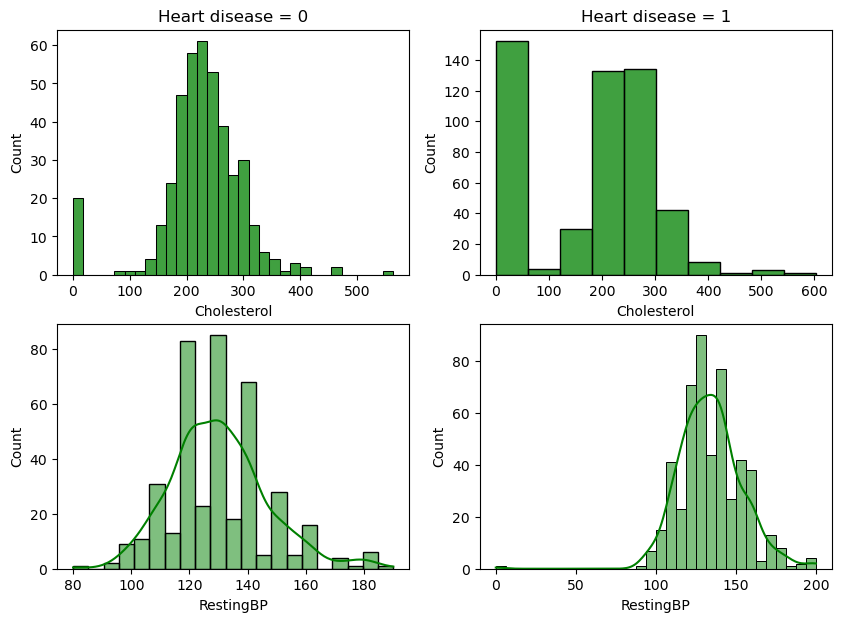

In [16]:
# Visualise some columns of our dataset
fig,axs = plt.subplots(2,2,figsize = (10,7))
sns.histplot(df[df.HeartDisease ==0].Cholesterol,ax = axs[0,0],color = 'green')
axs[0,0].set_title("Heart disease = 0")
sns.histplot(df[df.HeartDisease ==1].Cholesterol,ax = axs[0,1],color = 'green')
axs[0,1].set_title("Heart disease = 1")
sns.histplot(df[df.HeartDisease ==0].RestingBP,ax = axs[1,0],kde = True,color = 'green')
sns.histplot(df[df.HeartDisease ==1].RestingBP,ax = axs[1,1],kde = True,color = 'green')

In [17]:
# Convert categorical data into numerical (binary encoding)
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,0,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,0,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,1,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [18]:
# Convert categorical data into numerical (binary encoding)
df['ChestPainType'] = df['ChestPainType'].map({'TA': 0, 'ATA': 1, 'NAP': 2,'ASY':3})
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,Normal,172,N,0.0,Up,0
1,49,1,2,160,180,0,Normal,156,N,1.0,Flat,1
2,37,0,1,130,283,0,ST,98,N,0.0,Up,0
3,48,1,3,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,0,2,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,0,110,264,0,Normal,132,N,1.2,Flat,1
914,68,0,3,144,193,1,Normal,141,N,3.4,Flat,1
915,57,0,3,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,1,1,130,236,0,LVH,174,N,0.0,Flat,1


In [19]:
# Convert categorical data into numerical (binary encoding)
df['RestingECG'] = df['RestingECG'].map({'Normal': 0, 'ST': 1, 'LVH': 2})
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,N,0.0,Up,0
1,49,1,2,160,180,0,0,156,N,1.0,Flat,1
2,37,0,1,130,283,0,1,98,N,0.0,Up,0
3,48,1,3,138,214,0,0,108,Y,1.5,Flat,1
4,54,0,2,150,195,0,0,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,0,110,264,0,0,132,N,1.2,Flat,1
914,68,0,3,144,193,1,0,141,N,3.4,Flat,1
915,57,0,3,130,131,0,0,115,Y,1.2,Flat,1
916,57,1,1,130,236,0,2,174,N,0.0,Flat,1


In [20]:
# Convert categorical data into numerical (binary encoding)
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 0, 'N': 1})
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,1,0.0,Up,0
1,49,1,2,160,180,0,0,156,1,1.0,Flat,1
2,37,0,1,130,283,0,1,98,1,0.0,Up,0
3,48,1,3,138,214,0,0,108,0,1.5,Flat,1
4,54,0,2,150,195,0,0,122,1,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,0,110,264,0,0,132,1,1.2,Flat,1
914,68,0,3,144,193,1,0,141,1,3.4,Flat,1
915,57,0,3,130,131,0,0,115,0,1.2,Flat,1
916,57,1,1,130,236,0,2,174,1,0.0,Flat,1


In [21]:
# Convert categorical data into numerical (binary encoding)
df['ST_Slope'] = df['ST_Slope'].map({'Up': 0, 'Flat': 1, 'Down': 2})
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,1,0.0,0,0
1,49,1,2,160,180,0,0,156,1,1.0,1,1
2,37,0,1,130,283,0,1,98,1,0.0,0,0
3,48,1,3,138,214,0,0,108,0,1.5,1,1
4,54,0,2,150,195,0,0,122,1,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,0,110,264,0,0,132,1,1.2,1,1
914,68,0,3,144,193,1,0,141,1,3.4,1,1
915,57,0,3,130,131,0,0,115,0,1.2,1,1
916,57,1,1,130,236,0,2,174,1,0.0,1,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [23]:
# Split Data: Create training and testing datasets.
from sklearn.model_selection import train_test_split

# we want to guess HeartDisease(Y) bassed of other data (X)


# # create X and drop Heart Disease 
X = df.drop('HeartDisease', axis=1)  # Features

print(X.columns)

y = df['HeartDisease']               # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')


In [24]:
# Train the Model: Fit the model to the training data.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/opt/anaconda3/envs/ReDI_ML/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
# Evaluate the Model: Test the model and evaluate its performance.
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%') # % of correct guesses if they are likly to get heart diseases

Accuracy: 86.96%
